In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
#import cartopy.crs as ccrs

plt.rc('font', size=20)

%matplotlib inline

# List the content of the file

In [2]:
f = h5py.File('./data/conductance_world.h5','r')

for key in f.keys():
    print(key,': ', f[key].attrs['Description'])

average :  Depth-averaged conductivity of the ocean (S/m)
lat :  Geographic latitude (deg)
lon :  Geographic longitude (deg)
ocean :  Ocean conductance (S)
sed_thickness :  Sediments thickness interpolated from GlobSed-v2 (m)
sediments :  Conductance of marine sediments (S)
topography :  Bathymetry interpolated from ETOPO1 (m)


# Plot bathymetry and sediments thickness

In [3]:
# Coordinates of cell centers
lat = f['lat'][()]
lon = f['lon'][()]

# For plotting purposes, we al need coordinates of cell corners
d_ll = lat[1] - lat[0]
latlim = (-90 + d_ll/2., 90 - d_ll/2.)
lonlim = (-180 + d_ll/2., 180 - d_ll/2.)

lat_point = np.arange(latlim[0] - d_ll/2., latlim[1]+d_ll, d_ll, dtype=float)
lon_point = np.arange(lonlim[0] - d_ll/2., lonlim[1]+d_ll, d_ll, dtype=float)

topography = f['topography'][()]
thickness = f['sed_thickness'][()]

/tmp/ipykernel_13736/2358557425.py:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color='white')


(-89.95, 89.95)

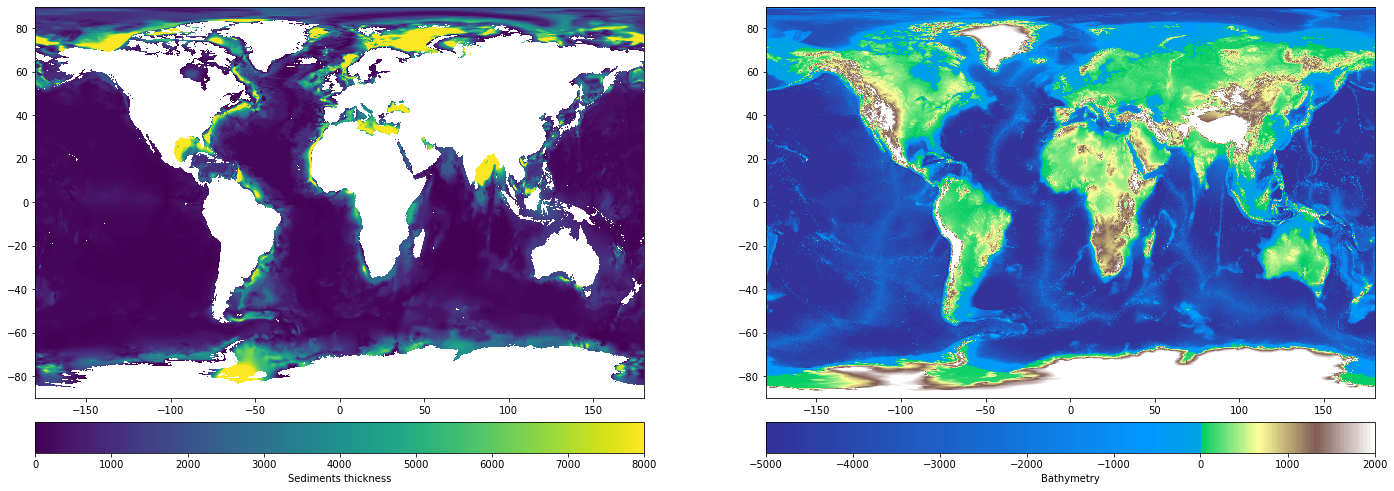

In [4]:
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map', all_colors)
divnorm = colors.TwoSlopeNorm(vmin=-5000, vcenter=0, vmax=2000)

sed_masked = np.ma.masked_where(thickness == 0., thickness)

cmap = plt.cm.get_cmap("viridis")
cmap.set_bad(color='white')

fig = plt.figure(figsize=(24, 9))
ax = fig.add_subplot(121)
pcm = ax.pcolormesh(lon_point, lat_point, sed_masked, vmin = 0, vmax = 8e3, cmap=cmap)
fig.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label = 'Sediments thickness')
ax.set_xlim(lonlim)
ax.set_ylim(latlim)

ax = fig.add_subplot(122)
pcm = ax.pcolormesh(lon_point, lat_point, -topography, norm=divnorm, cmap=terrain_map)
fig.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label = 'Bathymetry')
ax.set_xlim(lonlim)
ax.set_ylim(latlim)

plt.savefig('./conductance_world.png',dpi = 600,bbox_inches = 'tight', pad_inches = 0);

# Plot ocean and sediment conductance maps

In [5]:
ocean_conductance = f['ocean'][()]
sediment_conductance = f['sediments'][()]
ocean_avg_conductivity = f['average'][()]

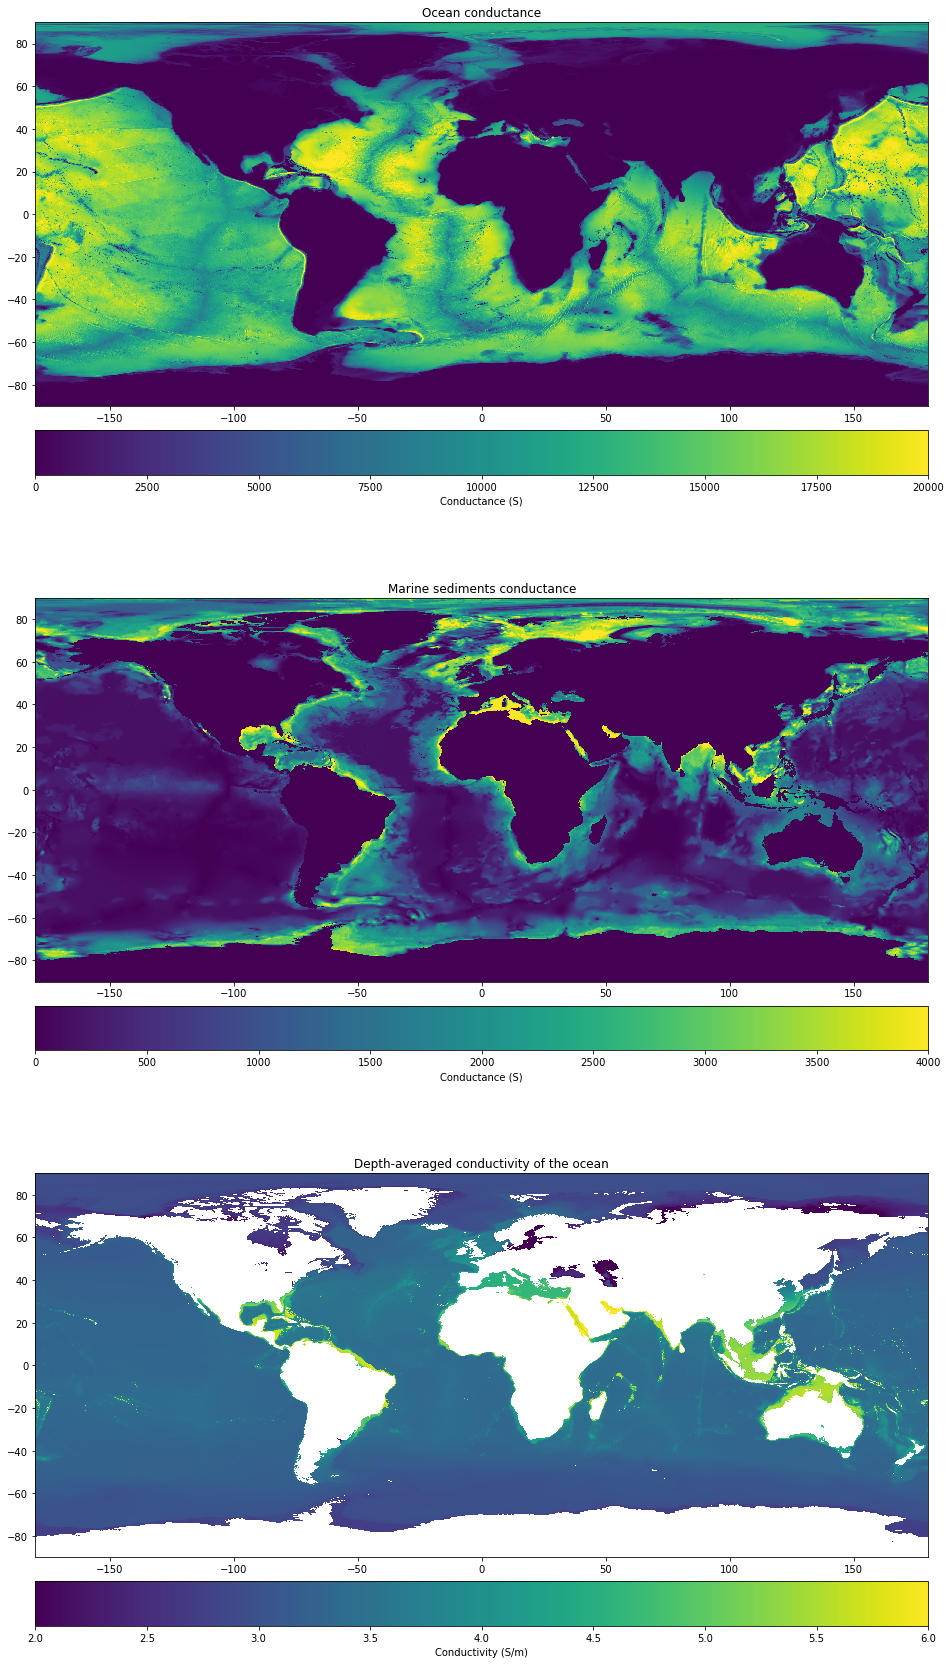

In [6]:
fig = plt.figure(figsize=(16, 30))
ax = fig.add_subplot(311)
pcm = ax.pcolormesh(lon_point, lat_point, ocean_conductance, vmin = 0., vmax = 2e4)
fig.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label = 'Conductance (S)')
ax.set_xlim(lonlim)
ax.set_ylim(latlim)
ax.set_title('Ocean conductance')

ax = fig.add_subplot(312)
pcm = ax.pcolormesh(lon_point, lat_point, sediment_conductance, vmin = 0., vmax = 4000.)
fig.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label = 'Conductance (S)')
ax.set_xlim(lonlim)
ax.set_ylim(latlim)
ax.set_title('Marine sediments conductance')

ax = fig.add_subplot(313)
pcm = ax.pcolormesh(lon_point, lat_point, ocean_avg_conductivity, vmin = 2., vmax = 6.)
fig.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label = 'Conductivity (S/m)')
ax.set_xlim(lonlim)
ax.set_ylim(latlim)
ax.set_title('Depth-averaged conductivity of the ocean')

plt.savefig('./conductance_maps.png',dpi = 600,bbox_inches = 'tight', pad_inches = 0);